# Project: Wrangling and Analyze Data
This project is an analysis of WeRateDogs twitter archive also known as @dog_rates. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10(most cases with more than 10 denominators involve multiple dogs). The numerators are mostly always greater than 10.This is because they have a unique rating system that permits that.

This data would be gathered, from 3 sources and atleast 8 Quality issues and 2 tidiness issues would be cleaned then the data saved and analyzed to create "wow" worthy insights and visualizatons

## Data Gathering
In the cell below, **all** three pieces of data for this project will be gathered and loaded in the notebook.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Import necessarry Libraries
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the file into a data frame
archive = pd.read_csv("twitter-archive-enhanced.csv")
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Write the contents of the url into a csv file 
url =  "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open ("image_prediction.tsv", 'wb')as file:
    file.write(response.content)

In [4]:
# Read the tsv file into a pandas Dataframe
images = pd.read_csv("image_prediction.tsv", sep='\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# The token keys and secret are hidden for policy reasons
import tweepy

consumer_key = '..........'
consumer_secret = '..........'
access_token = '.........'
access_secret = '.........'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
# Viewing a random sample of the tweet id
archive.tweet_id.sample()

1383    700847567345688576
Name: tweet_id, dtype: int64

In [7]:
# Check the json object and access them
twit = api.get_status(676575501977128964, tweet_mode='extended')
# twit._json.keys()
# source, created_at, id, favourites_count, retweet_count

In [8]:
import time

# time the process 
start_time = time.time()
print('Process started at', start_time)

# Create empty list to store unsuccessful ids
error_list = []
count=0

# Write each successful id into the txt file
with open('tweet_json.txt', mode="w") as file:
    # Loop through the tweet ids of the archive table 
    for id in archive.tweet_id:
        count+=1
        # Use a try and except block to catch errors without exiting the loop
        try:
            # Get the status of each tweet id
            tweet = api.get_status(id,tweet_mode = 'extended')
            # Write the successful id into the file
            json.dump(tweet._json, file)
            file.write('\n')
            # Unsucesssful ids are handled here
        except tweepy.TweepError as E:
            # Append the ids to the list
            error_list.append(id)
            
# time the end of the process
end_time = time.time()
print('Process ended at: ', end_time)
print("Total Time Taken = ", end_time-start_time)
# Count the number of successful and failed attempts
print(f"{count} were sucessful")
print(f"{len(error_list)} were unsuccesful")


In [9]:
# Create an empty list to store the needed data
extract_list=list()
# Read the txt file
with open('tweet_json.txt', 'r') as json_file:
    for lines in json_file.readlines():
        line = json.loads(lines)
        # Get the needed data from the file
        tweet_id = line["id"]
        retweet_count = line["retweet_count"]
        favorite_count = line["favorite_count"]
        # Append the data to a list
        extract_list.append({
            "tweet_id" : tweet_id ,
            "retweet_counts" : retweet_count,
            "favorite_counts" : favorite_count            
            })

In [10]:
# Convert the list to a dataframe
add_tweet = pd.DataFrame(extract_list, columns = ["tweet_id", "retweet_counts", "favorite_counts"])

In [11]:
# Confirm the process
add_tweet.head()

,tweet_id,retweet_counts,favorite_counts
0,892420643555336193,6976,33702
1,892177421306343426,5280,29232
2,891815181378084864,3466,21974
3,891689557279858688,7190,36777
4,891327558926688256,7723,35167


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.


In [12]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Archive Dataset Column Description


tweet_id - unique id for each tweet made by WeRateDogs

in_reply_to_status_id - Tweet ids of tweets that are replies

in_reply_to_user_id - tweet id of the reply

timestamp - The time the tweet was made

source - The source of the tweet e.g Iphone 

text - This is the content of the tweet that was made

retweeted_status_id - this represents retweets of the tweet

retweeted_status_user_id - The retweet user id

retweeted_status_timestamp - The time the retweet was made

expanded_urls - This is the direct link of the tweet

rating_numerator - This is the numerator of the ratings for the dog

rating_denominator - This is the denominator of the ratings for the dog(should always be 10, but more than 10 in case of multiple dogs)

name - This is the name of the dog

doggo - This is one of the dog stages

floofer - This is one of the dog stages

pupper - This is one of the dog stages

puppo - This is one of the dog stages


In [13]:
# Checking the shape of the dataset
archive.shape

(2356, 17)

This dataset has 2356 rows and 17 columns

In [14]:
# A summary of the dataset
archive.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tweet_id,2356,NaN,NaN,NaN,7.42772e+17,6.8567e+16,6.66021e+17,6.78399e+17,7.19628e+17,7.99337e+17,8.92421e+17
in_reply_to_status_id,78,NaN,NaN,NaN,7.45508e+17,7.58249e+16,6.65815e+17,6.75742e+17,7.03871e+17,8.2578e+17,8.86266e+17
in_reply_to_user_id,78,NaN,NaN,NaN,2.01417e+16,1.2528e+17,1.18563e+07,3.08637e+08,4.19698e+09,4.19698e+09,8.40548e+17
timestamp,2356,2356,2016-02-13 03:59:01 +0000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,2356,4,"<a href=""http://twitter.com/download/iphone"" r...",2221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,2356,2356,RT @dog_rates: This is Klein. These pics were ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_id,181,NaN,NaN,NaN,7.7204e+17,6.23693e+16,6.66104e+17,7.18631e+17,7.80466e+17,8.20315e+17,8.87474e+17
retweeted_status_user_id,181,NaN,NaN,NaN,1.2417e+16,9.59925e+16,783214,4.19698e+09,4.19698e+09,4.19698e+09,7.87462e+17
retweeted_status_timestamp,181,181,2015-11-19 00:32:12 +0000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expanded_urls,2297,2218,https://twitter.com/dog_rates/status/844704788...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Checking for duplicates
archive.duplicated().sum()

0

In [16]:
# checking for null values
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
# Checking the denominator ranges of values
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

The denominator has some values more than 10, the text of such tweet should give us insight into the reason for this.

In [18]:
archive[archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [19]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
# Checking the test of outrageous ratings
archive.text[archive.rating_numerator==88].values

array([ 'Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw'], dtype=object)

In [21]:
archive.text[archive.rating_numerator==99].values

array([ "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1"], dtype=object)

It can be observed from the tweet text that most ratings with extremely high denominators or numerators are associated with multiple dogs

In [22]:
# Checking the counts of the data
archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
Sadie          8
the            8
Bailey         7
Toby           7
Daisy          7
an             7
Buddy          7
Koda           6
Bella          6
Dave           6
Rusty          6
Jack           6
Oscar          6
Leo            6
Scout          6
Stanley        6
Jax            6
Milo           6
Finn           5
            ... 
Naphaniel      1
Pumpkin        1
Yoda           1
Sweet          1
Kirk           1
Sunshine       1
Jeffri         1
Jazzy          1
Hero           1
Superpup       1
Batdog         1
Zeek           1
Mabel          1
Juckson        1
Cal            1
Willem         1
Travis         1
Philippe       1
Aldrick        1
Buddah         1
Maude          1
Ito            1
Kloey          1
Olaf           1
Koko           1
Harrison       1
Creg           1
Dewey         

Some dog names are invalid(a,an,the)

In [23]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

The source has some unclear details that makes it difficult to understand

In [24]:
archive.expanded_urls.duplicated().sum()

137

In [25]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [26]:
# checking samples of the dataset
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1102,721001180231503872,https://pbs.twimg.com/media/CgGCvxAUkAAx55r.jpg,1,Samoyed,0.950053,True,washbasin,0.006321,False,tub,0.006243,False
36,666447344410484738,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg,1,curly-coated_retriever,0.322084,True,giant_schnauzer,0.287955,True,Labrador_retriever,0.166331,True
1953,863907417377173506,https://pbs.twimg.com/media/C_03NPeUQAAgrMl.jpg,1,marmot,0.358828,False,meerkat,0.174703,False,weasel,0.123485,False
1572,795076730285391872,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
1856,841439858740625411,https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg,3,military_uniform,0.853684,False,Labrador_retriever,0.048200,True,groenendael,0.015394,True


### Images column description

tweet_id - unique id for each tweet by the twitter account

jpg_url - url for the dog image

img_num - image number ranging from 1 to 4

p1 - the algorithm's #1 prediction for the image in the tweet

p1_conf - how confident the algorithm is in its #1 prediction

p1_dog - whether or not the #1 prediction is a breed of dog

p2 - the algorithm's #2 prediction for the image in the tweet

p2_conf - how confident the algorithm is in its #2 prediction

p2_dog - whether or not the #2 prediction is a breed of dog

p3 - the algorithm's #3 prediction for the image in the tweet

p3_conf - how confident the algorithm is in its #3 prediction

p3_dog- whether or not the #3 prediction is a breed of dog

(column description was gotten from Project motivation in classroom)

In [27]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


This dataframe has 2075 rows and 12 columns

In [28]:
# Checking random samples of the dataframe
add_tweet.sample()

,tweet_id,retweet_counts,favorite_counts
1211,712092745624633345,812,2704


In [29]:
add_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id           2327 non-null int64
retweet_counts     2327 non-null int64
favorite_counts    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


### add_tweet column description

tweet_id - unique id for each tweet

retweet_count - the number of retweets made

favorite_count - the number of likes accrued

In [30]:
all_columns = pd.Series(list(archive) + list(images) + list(add_tweet))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Quality issues
1. Missing data in multiple columns of the Archive Table (retweeted_status_user_id,retweeted_status_id,retweeted_status_timestamp,in_reply_to_user_id,in_reply_to_status_id)

2. Unclear source description in the archive table

3. Name column in the Archive table with dog name is 'a', 'an', 'the'

4. Time stamp in Archive table is type object

5. index 2335 in the archive table (rating of 1/2)

6. tweet_id data type is int in images and add_tweet tables

7. in the images table invalid dog breeds (hen,cock, desktop_computer, ox, orange, paper_towel)

8. irrelevant column image number in the images table needs to be dropped

9. Text column should be dropped since all necessary info has been extracted

### Tidiness issues
1. Seperated tables
2. last 3 columns of the archive table should be one column 'dog_stage'

## Cleaning Data
In this section, i will clean **all** of the issues I documented while assessing. 


In [31]:
# Make copies of original pieces of data
archive_clean = archive.copy()
images_clean = images.copy()
add_tweet_clean = add_tweet.copy()

### Issue #1:
 Drop Missing data in multiple columns of the Archive Table 

#### Define:
Drop Multiple columns contain missing data based on the retweet_status since we only need original tweets not retweeted tweets

#### Code

In [32]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [33]:
len(archive_clean.query("retweeted_status_id != 'NaN'"))

181

In [34]:
len(archive_clean.query("in_reply_to_status_id != 'NaN'"))

78

In [35]:
len(archive_clean.query("retweeted_status_user_id != 'NaN'"))

181

In [36]:
len(archive_clean.query("in_reply_to_user_id != 'NaN'"))

78

In [37]:
len(archive_clean.query("retweeted_status_timestamp != 'NaN'"))

2356

In [38]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull()]

In [39]:
archive_clean.retweeted_status_id.notnull().sum()

0

In [40]:
archive_clean.retweeted_status_user_id.notnull().sum()

0

In [41]:
archive_clean.in_reply_to_status_id.notnull().sum()

0

In [42]:
archive_clean.drop(columns=["in_reply_to_status_id", 
                            "in_reply_to_user_id", 
                            "retweeted_status_id",
                           "retweeted_status_user_id",
                           "retweeted_status_timestamp",
                           "expanded_urls"], inplace = True)

#### Test

In [43]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


### Issue #2:
Unclear source description in the archive table

#### Define
Extract the source from the href description

#### Code

In [44]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [45]:
archive_clean.source = archive_clean.source.apply(lambda x: x.split(">")[-2]).map(lambda x: x.split("<")[0])

#### Test

In [46]:
archive_clean.source.sample(5)

667     Twitter for iPhone
89      Twitter for iPhone
1900    Twitter for iPhone
1956    Twitter for iPhone
914     Twitter for iPhone
Name: source, dtype: object

### Issue #3:
Name column in the Archive table with dog name is 'a', 'an', 'the'

#### Define
since name column would not be relevant to the analysis lets drop it

#### Code

In [47]:
archive_clean.drop(columns = "name", inplace=True)

#### Test

In [48]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #4:
Time stamp in Archive table is type object and other errroneous data type

#### Define
Change timestamp to type date_time, source to category, tweet_id data type to str

#### Code

In [49]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

In [50]:
archive_clean.source = archive_clean.source.astype("category")

In [51]:
archive_clean.tweet_id = archive_clean.tweet_id.astype("str")

#### Test

In [52]:
archive_clean.timestamp.dtype

dtype('<M8[ns]')

In [53]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null category
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(6)
memory usage: 166.1+ KB


### Issue #5:
index 2335 in the archive table (rating of 1/2)

#### Define
Change index 2335 in the archive table (rating of 1/2) to 1/10

#### Code

In [54]:
(archive_clean.iloc[2000])

tweet_id                                             667766675769573376
timestamp                                           2015-11-20 18:09:16
source                                               Twitter Web Client
text                  This is Calvin. He is a Luxembourgian Mayo. Ha...
rating_numerator                                                      9
rating_denominator                                                   10
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 2256, dtype: object

From the text we can see that the ratings is 9/10 not 1/2

In [55]:
mask_den = archive_clean['rating_denominator']==2

In [56]:
archive_clean.loc[mask_den, ('rating_numerator')] = 9

In [57]:
archive_clean.loc[mask_den, ('rating_denominator')] = 10

#### Test

In [58]:
archive_clean[archive_clean.index ==2335]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
2335,666287406224695296,2015-11-16 16:11:11,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,9,10,None,None,None,None


### Issue #6:
tweet_id data type is int in images and add_tweet tables

#### Define
Change data type of tweet_id in the images and add_tweet tables

#### Code

In [59]:
images_clean.tweet_id = images_clean.tweet_id.astype(str)
add_tweet_clean.tweet_id = add_tweet_clean.tweet_id.astype(str)

#### Test

In [60]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [61]:
add_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id           2327 non-null object
retweet_counts     2327 non-null int64
favorite_counts    2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


### Issue #7:
in the images table invalid dog breeds (hen,cock, desktop_computer, ox, orange, paper_towel)

#### Define
Drop columns with a false p1_dog prediction

#### Code

In [62]:
images_clean = images_clean[images_clean.p1_dog !=False]

#### Test

In [63]:
images_clean[images_clean.p1_dog ==False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #8:
irrelevant column (img_num) in the images table

#### Define
Drop image number in the images table

#### Code

In [64]:
images_clean.drop(columns = 'img_num', inplace = True)

#### Test

In [65]:
images_clean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #9:
Seperated tables

#### Define
Merge all tables together

#### Code

In [66]:
images_clean = images_clean.merge(add_tweet_clean, how = 'inner', on = 'tweet_id')

In [67]:
archive_clean = archive_clean.merge(images_clean, how = 'inner', on = 'tweet_id')

#### Test

In [68]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1454
Data columns (total 22 columns):
tweet_id              1455 non-null object
timestamp             1455 non-null datetime64[ns]
source                1455 non-null category
text                  1455 non-null object
rating_numerator      1455 non-null int64
rating_denominator    1455 non-null int64
doggo                 1455 non-null object
floofer               1455 non-null object
pupper                1455 non-null object
puppo                 1455 non-null object
jpg_url               1455 non-null object
p1                    1455 non-null object
p1_conf               1455 non-null float64
p1_dog                1455 non-null bool
p2                    1455 non-null object
p2_conf               1455 non-null float64
p2_dog                1455 non-null bool
p3                    1455 non-null object
p3_conf               1455 non-null float64
p3_dog                1455 non-null bool
retweet_counts        1455 n

### Issue #10:
The last 3 columns of the archive table should be one column 'dog_stage'

#### Define
melt the last 3 columns of the archive table into one

#### Code

In [69]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_counts', 'favorite_counts'],
      dtype='object')

In [70]:
archive_clean.replace('None', "", inplace=True)

In [71]:
archive_clean["dog_stage"] = archive_clean.doggo +""+ archive_clean['floofer'] +""+ archive_clean["pupper"] + "" +archive_clean.puppo

In [72]:
archive_clean.drop(columns= ['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [73]:
archive_clean.dog_stage.value_counts()

                1229
pupper           144
doggo             47
puppo             19
doggopupper        7
floofer            7
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [74]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1454
Data columns (total 19 columns):
tweet_id              1455 non-null object
timestamp             1455 non-null datetime64[ns]
source                1455 non-null object
text                  1455 non-null object
rating_numerator      1455 non-null int64
rating_denominator    1455 non-null int64
jpg_url               1455 non-null object
p1                    1455 non-null object
p1_conf               1455 non-null float64
p1_dog                1455 non-null bool
p2                    1455 non-null object
p2_conf               1455 non-null float64
p2_dog                1455 non-null bool
p3                    1455 non-null object
p3_conf               1455 non-null float64
p3_dog                1455 non-null bool
retweet_counts        1455 non-null int64
favorite_counts       1455 non-null int64
dog_stage             1455 non-null object
dtypes: bool(3), datetime64[ns](1), float64(3), int64(4), object(8)
memory 

### Issue #11:
Text column should be dropped

### Define
Drop text column since necessary info has been extracted

### Code

In [75]:
archive_clean.drop(columns="text", inplace=True)

### Test

In [76]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1454
Data columns (total 18 columns):
tweet_id              1455 non-null object
timestamp             1455 non-null datetime64[ns]
source                1455 non-null object
rating_numerator      1455 non-null int64
rating_denominator    1455 non-null int64
jpg_url               1455 non-null object
p1                    1455 non-null object
p1_conf               1455 non-null float64
p1_dog                1455 non-null bool
p2                    1455 non-null object
p2_conf               1455 non-null float64
p2_dog                1455 non-null bool
p3                    1455 non-null object
p3_conf               1455 non-null float64
p3_dog                1455 non-null bool
retweet_counts        1455 non-null int64
favorite_counts       1455 non-null int64
dog_stage             1455 non-null object
dtypes: bool(3), datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 186.1+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [77]:
archive_clean.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
This section contains the analysis and visualization of my wrangled data.

In [78]:
# Read the file into a pandas dataframe
df = pd.read_csv("twitter_archive_master.csv")

In [79]:
df.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_counts,favorite_counts,dog_stage
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,13,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5280,29232,NaN
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,12,10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3466,21974,NaN
2,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,12,10,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7723,35167,NaN
3,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,13,10,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2586,17736,NaN
4,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,13,10,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,1649,10323,NaN


### Insights:
1. What dog stage is associated with the highest likes

2. What dog stage is associated with the highest popularity(retweet_counts)

3. Which dog breed(p1) has the highest likes and retweets

### Insight 1:
What dog stage is associated with the highest likes



In [80]:
# Group the dataframe 
likes = df.groupby(["dog_stage"])["favorite_counts"].mean()
likes.sort_values(ascending = False)

dog_stage
doggopuppo      41814.000000
puppo           20313.315789
doggo           18931.404255
doggofloofer    14811.000000
doggopupper     13418.000000
floofer         11183.000000
pupper           6941.694444
Name: favorite_counts, dtype: float64

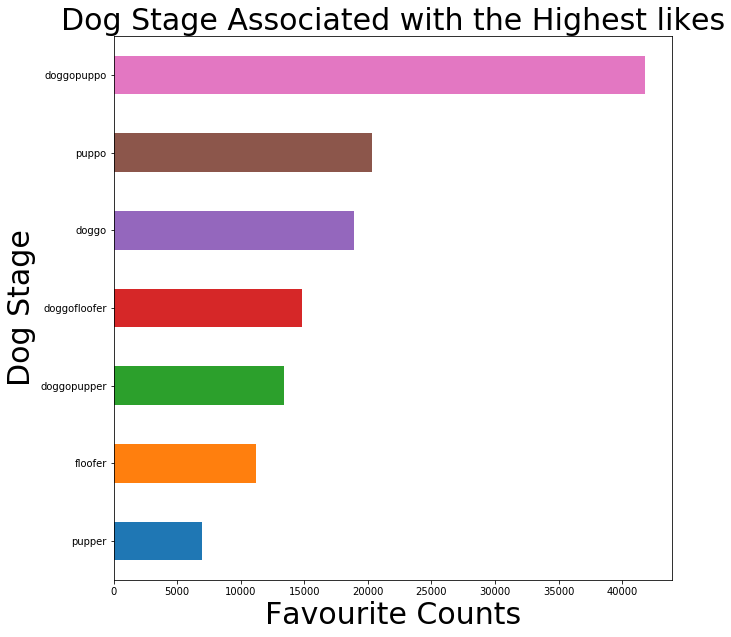

In [81]:
# Plot the values
likes.sort_values().plot(kind='barh', figsize=(10,10));
plt.ylabel("Dog Stage", fontsize=(30))
plt.xlabel("Favourite Counts", fontsize=(30))
plt.title("Dog Stage Associated with the Highest likes", fontsize=(30));

Dogs at the doggopuppo, doggo and puppo stages have the highest like

### Insight 2:
What dog stage is associated with the highest popularity(retweet_counts)


In [82]:
# Group the dataframe 
popular = df.groupby(["dog_stage"])["retweet_counts"].mean()
popular.sort_values(ascending=False)

dog_stage
doggopuppo      16086.000000
doggo            6407.170213
puppo            5395.368421
floofer          3962.857143
doggopupper      3940.142857
doggofloofer     2786.000000
pupper           2061.840278
Name: retweet_counts, dtype: float64

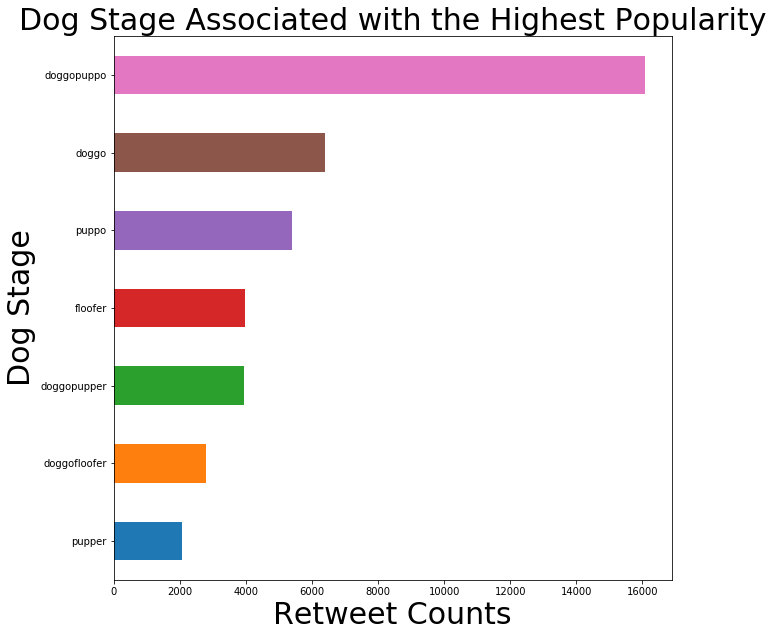

In [83]:
# Plot the values
popular.sort_values().plot(kind='barh', figsize=(10,10));
plt.ylabel("Dog Stage", fontsize=(30))
plt.xlabel("Retweet Counts", fontsize=(30))
plt.title("Dog Stage Associated with the Highest Popularity",fontsize=(30));

Dogs at the doggopuppo, doggo and puppo stages have the highest popularity or retweet counts

### Insight 3:
Which dog breed(p1) has the highest likes and retweets

In [84]:
most_loved_breed = df.groupby(["p1"])["favorite_counts", "retweet_counts"].mean()
# most_loved_breed.sort_values(by=["favorite_counts"], ascending=False)
# most_loved_breed.sort_values(by=["retweet_counts"], ascending=False)

In [85]:
most_loved = df.groupby(["p1"])["favorite_counts"].mean().sort_values(ascending=False)
most_loved.head()

p1
Saluki                     20727.250000
French_bulldog             16292.240000
Afghan_hound               14658.333333
black-and-tan_coonhound    14615.000000
giant_schnauzer            14612.000000
Name: favorite_counts, dtype: float64

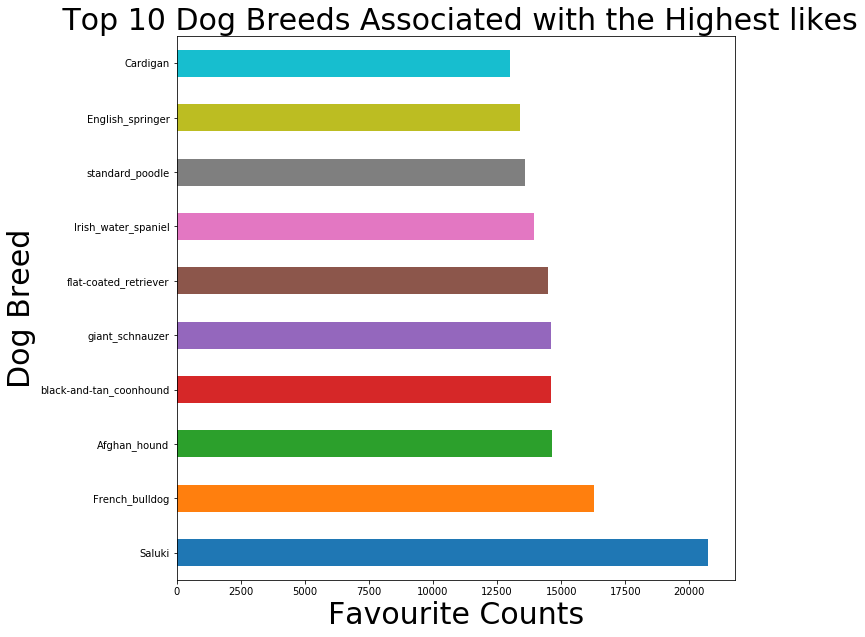

In [86]:
most_loved.sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,10));
plt.ylabel("Dog Breed", fontsize=(30))
plt.xlabel("Favourite Counts", fontsize=(30))
plt.title(" Top 10 Dog Breeds Associated with the Highest likes", fontsize=(30));

The saluki breed tops the list of most liked breed

In [87]:
# Find the most popular dog breed
most_popular = df.groupby(["p1"])["retweet_counts"].mean().sort_values(ascending=False)
most_popular.head()

p1
standard_poodle     5398.000000
English_springer    4847.111111
Afghan_hound        4770.333333
Eskimo_dog          4394.500000
Saluki              4117.000000
Name: retweet_counts, dtype: float64

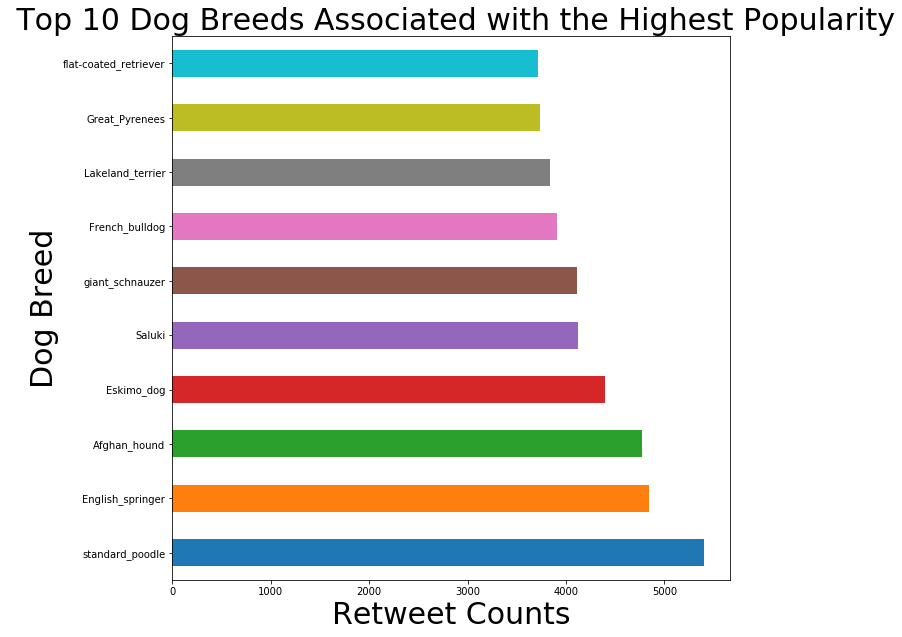

In [88]:
# Plot the values
most_popular.sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,10));
plt.ylabel("Dog Breed", fontsize=(30))
plt.xlabel("Retweet Counts", fontsize=(30))
plt.title(" Top 10 Dog Breeds Associated with the Highest Popularity", fontsize=(30));

The Standard_poodle tops the list of the most popular breed

### Visualization

In [89]:
df[["rating_denominator","rating_numerator","favorite_counts","retweet_counts"]].corr()

,rating_denominator,rating_numerator,favorite_counts,retweet_counts
rating_denominator,1.000000,0.933449,-0.026825,-0.017650
rating_numerator,0.933449,1.000000,0.078783,0.063277
favorite_counts,-0.026825,0.078783,1.000000,0.927072
retweet_counts,-0.017650,0.063277,0.927072,1.000000


It is clear that there is a strong correlation between the ratings(numerator and denominator) as well as between favorite and retweet counts

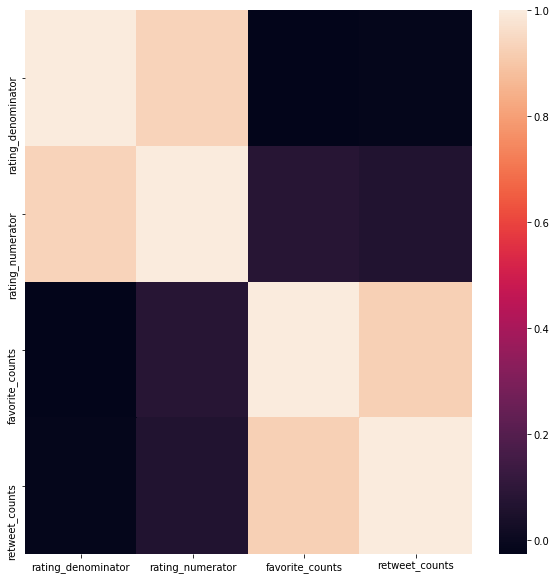

In [90]:
data = df[["rating_denominator","rating_numerator","favorite_counts","retweet_counts"]].corr()
plt.subplots(figsize=(10,10))
sns.heatmap(data);

### Conclusion
- The retweet column was not empty hence the not null values had to be dropped for us to have only the original tweets
- Most cases with more than 10 denominators involve multiple dogs
- The data set shows that the doggopuppo, doggo and puppo dog stages have the highest likes and retweets
- The most popular breed is the standard poodle and the most liked is the saluki
- 

### Limitations
- During the data gathering process 29 tweet ids were unsuccessfully read, our analysis is short of a few rows.

## Resources




[Plotting with seaborn](github.com/mwaskom/seaborn/issues/1735)

[data wrangling project example](github.com/Nonso-Analytics/Udacity-Data-Wrangling/blob/master/wrangle_act.ipynb)

[How to time a function](https://www.codegrepper.com/code-examples/python/python+find+how+much+time+a+function+takes)

[Using json.dumps](https://www.geeksforgeeks.org/json-dumps-in-python/)

[Combining columns in a dataframe](https://sparkbyexamples.com/pandas/pandas-combine-two-columns-of-text-in-dataframe/)

[updating values in a column](https://www.easytweaks.com/update-values-dataframe-pandas-python/)

[Tweepy](https://www.tweepy.org/)

[Twwepy Api reference](https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id)

[Extracting insights](https://towardsdatascience.com/olympics-kaggle-dataset-exploratory-analysis-part-2-understanding-sports-4b8d73a8ec30)

[Merging Dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html?highlight=merge#pandas.DataFrame.merge)
